<!--<badge>--><a href="https://colab.research.google.com/github/Reversean/opt-labs/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

# Расчетное задание 1

## Тема: Многокритериальная оптимизация

Выполнил студент гр. 3540901/21501 Лихолетов М.Д.

Руководитель, к.т.н., доц. Сиднев А.Г.

## Задача 22

Фирма производит два продукта А и В, продаваемых соответственно по 8 и по 15 руб. за упаковку. Рынок сбыта для каждого из них не ограничен.

Продукт А обрабатывается на машине 1, продукт В – на машине 2, затем оба упаковываются на фабрике.

Машина 1 (2) обрабатывает 5000 (4000) кг сырья в час с потерями 10% (20%). Машина 1 (2) может работать до 6 (5) часов в день, ее использование стоит 288 (336) руб./час. На производство единицы продукта А (В) требуется 1/4 (1/3) кг сырья. 1 кг сырья стоит 6 копеек.

Упаковочная фабрика может работать не менее 8, но не более 10 часов в день. За 1 час работы фабрики можно упаковать 12000 (8000) продукта А (В). Затраты на работу упаковочной фабрики составляют 360 руб/час.

Компания хочет определить такие значения х1 и х2 потребления сырья для продуктов А и В, при которых дневная прибыль максимальна, а затраты предприятия минимальны при условии получения не менее 80% максимальной дневной прибыли.


Для решения расчетного задания требуется выполнить следующие шаги:

1. Преобразовать многокритериальную задачу в однокритериальную при помощи следующих методов:
    - выделение главного критерия;
    - свертка критериев (аддитивная и мультипликативная);
    - maximin или minimax свертка;
    - метод последовательных уступок;
    - fgoalattain;
    - ведение метрики в пространстве критериев.
2. Решить задачу стохастического программирования для одной из однокритериальных задач, используя трансформацию детерменированного ограничения в вероятностного:

$$
P(\sum_{j=1}^n a_{ij} x_j - b_i \leq 0) \geq \alpha_i \\
$$

- $\alpha$ меняется в диапазоне $0.1 \leq \alpha \leq 0.9$
- $b_i$ и $a_{ij}$ считаются случайной величиной

## 1. Математическая модель задачи многокритериальной оптимизации

Для построения математической модели поставленной задачи введем ряд обозначений:
- $a_i$ – денежная прибыль, приносимая продуктом $i$ (руб/ед);
- $b_i$ – потребление сырья машиной $i$ (кг/ч);
- $c_i$ – потери при потреблении сырья машиной $i$ (кг/ч);
- $d_i$ – время работы машины $i$ (ч/сут);
- $e_i$ – стоимость работы машины $i$ (руб/ч);
- $g_i$ – кол-во сырья для производства продукта $i$ (кг/ед);
- $h$ – стоимость сырья (руб/кг);
- $k_i$ – скорость упаковки продуктов типа $i$ (ед/ч);
- $l$ – стоимость работы фабрики (руб/ч);

Математическая модель поставленной задачи может быть записана следующим образом:

\begin{gather}
    x_i = b_i d_i\\
    z_1 = \sum_{i=1}^2{\frac{a_i b_i d_i}{g_i} * (1 - c_i)} \rightarrow max\\
    z_2 = \sum_{i=1}^2{d_i e_i + b_i d_i h + \frac{b_i d_i l * (1 - c_i)}{g_i k_i}} \rightarrow min\\
\end{gather}

\begin{cases}
    0 \leq d_1 \leq 6\\
    0 \leq d_2 \leq 5\\
    8 \leq \sum_{i=1}^2{\frac{b_i d_i * (1 - c_i)}{g_i k_i}} \leq 10\\
    z_1 \geq 0.8 z^{max}_1
\end{cases}

где $x_i$ – потребление сырья для производства продуктов $i$ за сутки, $z_1$ – прибыль за сутки, $z_1$ – затраты предприятия за сутки.

Численные значения параметров:

\begin{array}{ l l }
    a_1 = 8 руб; & a_2 = 15 руб;\\
    b_1 = 5000 кг/ч; & b_2 = 4000 кг/ч;\\
    c_1 = 0.1; & c_2 = 0.2;\\
    e_1 = 288 руб/ч; & e_2 = 336 руб/ч;\\
    g_1 = 1/4 кг; & g_2 = 1/3 кг;\\
    k_1 = 12000; & k_2 = 8000;\\
    l = 360 руб/ч; & h = 0.06 руб.
\end{array}

Для дальнейшего использования математической модели для решения задач при помощи программных библиотек, требуется заменить функции поиска максимумов на функции поиска минимумов, а также представить ограничения в матричном виде:

\begin{gather}
    x_i = b_i d_i\\
    y_1 = -\sum_{i=1}^2{\frac{a_i b_i d_i}{g_i} * (1 - c_i)} \rightarrow min\\
    y_2 = \sum_{i=1}^2{d_i e_i + b_i d_i h + \frac{b_i d_i l}{g_i k_i} * (1 - c_i)} \rightarrow min\\
    y_1 \leq 0.8 y^{min}_1\\
\end{gather}

$$
\begin{bmatrix}
    0\\
    0\\
    8
\end{bmatrix}
\leq
\begin{bmatrix}
    1 && 0\\
    0 && 1\\
    \frac{b_1}{g_1 k_1} * (1 - c_1) && \frac{b_2}{g_2 k_2} * (1 - c_2)\\
\end{bmatrix}
\times
\begin{bmatrix}
    d_1\\
    d_2
\end{bmatrix}
\leq
\begin{bmatrix}
    6\\
    5\\
    10
\end{bmatrix}
$$

### 1.1. Поиск оптимумов частных критериев

Требуется найти оптимумы каждой целевой функции независимо от остальных, т.е. при одних и тех же ограничениях решить две однокритериальные задачи оптимизации: для $y_1$ и для $y_2$.

Для поиска оптимумов использовалась функция `minimize` из библиотеки [SciPy](https://docs.scipy.org/doc/scipy/index.html).

Параметры:

In [3]:
a = [8, 15]  # денежная прибыль, приносимая продуктами
b = [5000, 4000]  # потребление сырья машинами
c = [0.1, 0.2]  # потери при потреблении сырья машинами
e = [288, 336]  # стоимость работы машин
g = [1 / 4, 1 / 3]  # кол-во сырья для производства продуктов
h = 0.06  # стоимость сырья
k = [12000, 8000]  # скорость упаковки продуктов
l = 360  # стоимость работы фабрики

m_min = [0, 0]  # минимальное время работы машин
m_max = [6, 5]  # максимальное время работы машин
n_min = 8  # минимальное время работы фабрики
n_max = 10  # максимальное время работы фабрики
o_min = 0.8  # коэффициент минимально допустимой прибыли

args_count = 2

Целевые функции:

In [4]:
def z1(d):
    result = 0
    for i in range(len(d)):
        result += a[i] * b[i] * d[i] * (1 - c[i]) / g[i]
    return result


def y1(d):
    return -z1(d)


def z2(d):
    result = 0
    for i in range(len(d)):
        result += d[i] * e[i] + b[i] * d[i] * h + b[i] * d[i] * l * (1 - c[i]) / (g[i] * k[i])
    return result


def y2(d):
    return z2(d)

Функциональные ограничения:

In [5]:
from scipy.optimize import LinearConstraint, Bounds

init_bounds = Bounds(m_min, m_max)
init_constraints = LinearConstraint(
    [[b[0] * (1 - c[0]) / (g[0] * k[0]), b[1] * (1 - c[1]) / (g[1] * k[1])]],
    [n_min],
    [n_max]
)

Класс для хранения результатов оптимизации

In [6]:
class OptimizationResult:

    def __init__(self, args, fun):
        self.args = args[:args_count]
        self.fun = fun

    def get_x(self):
        return [d * b[i] for i, d in enumerate(self.args)]

    def output_result_x(self):
        for i, x in enumerate(self.get_x()):
            print('x{} = {:.2f}'.format(i + 1, x))

Функция для минимизации и сохранения результатов в виде экземпляра класса `OptimizationResult`:

In [7]:
from scipy.optimize import minimize
import numpy as np

start_args = np.zeros(2)


def optimize(fun, start=start_args, constraints=init_constraints, bounds=init_bounds, hess=lambda _: np.zeros((2, 2))):
    result = minimize(
        fun,
        start,
        method='trust-constr',
        constraints=constraints,
        bounds=bounds,
        hess=hess
    )
    return OptimizationResult(result.x, result.fun)

Поиск оптимумов частных критериев $y_1$:

In [8]:
y1_min_result = optimize(y1)
y1_min = y1_min_result.fun

y1_min_result.output_result_x()
print('y1_min = {}'.format(y1_min))

x1 = 13333.34
x2 = 19999.99
y1_min = -1103999.8076384393


Поиск оптимумов частных критериев $y_2$:

In [9]:
y2_min_result = optimize(y2)
y2_min = y2_min_result.fun

y2_min_result.output_result_x()
print('y2_min = {}'.format(y2_min))

x1 = 26666.64
x2 = 0.03
y2_min = 6016.001600003909


Таким образом были получены минимальные значения:

In [10]:
from pandas import options
from pandas import DataFrame

options.display.float_format = '{:.2f}'.format

opt_x = [y1_min_result.get_x(), y2_min_result.get_x()]

min_values_table = DataFrame({
    'criterion': ['y_1', 'y_2'],
    'x_1': [x[0] for x in opt_x],
    'x_2': [x[1] for x in opt_x],
    'min': [y1_min, y2_min]
})
min_values_table.set_index('criterion')

,x_1,x_2,min
criterion,,,
y_1,13333.34,19999.99,-1103999.81
y_2,26666.64,0.03,6016.00


## 2. Переход от многокритериальной задачи к однокритериальной

### 2.1. Выделение главного критерия

Метод выделения главного критерия подразумевает выбор одного критерия в качестве главного, а все остальные критерии должны быть преобразованы в ограничения.

Т.к. критерий $y_1$ уже имеет свое преобразование в виде ограничения $y_1 \leq 0.8 y_1^{min}$, то из кандидатов на главный критерий остается только $y_2$.

Итоговая математическая модель задачи однокритериальной оптимизации имеет следующий вид:

\begin{gather}
    x_i = b_i d_i\\
    f = y_2 = \sum_{i=1}^2{d_i e_i + b_i d_i h + \frac{b_i d_i l}{g_i k_i} * (1 - c_i)} \rightarrow min\\
\end{gather}

$$
\begin{bmatrix}
    0\\
    0\\
    8\\
    -\infty
\end{bmatrix}
\leq
\begin{bmatrix}
    1 && 0\\
    0 && 1\\
    \frac{b_1}{g_1 k_1} * (1 - c_1) && \frac{b_2}{g_2 k_2} * (1 - c_2)\\
    -\frac{a_1 b_1}{g_1} * (1 - c_1) && -\frac{a_2 b_2}{g_2} * (1 - c_2)
\end{bmatrix}
\times
\begin{bmatrix}
    d_1\\
    d_2
\end{bmatrix}
\leq
\begin{bmatrix}
    6\\
    5\\
    10\\
    0.8 y^{min}_1
\end{bmatrix}
$$

Изменение ограничений:

In [11]:
full_constraints = LinearConstraint(
    [
        [b[0] * (1 - c[0]) / (g[0] * k[0]), b[1] * (1 - c[1]) / (g[1] * k[1])],
        [-a[0] * b[0] * (1 - c[0]) / g[0], -a[1] * b[1] * (1 - c[1]) / g[1]]
    ],
    [n_min, -np.inf],
    [n_max, o_min * y1_min]
)

Метод вывода результатов:

In [12]:
z1_max = z1(y1_min_result.args)
z2_min = z2(y2_min_result.args)


def output_results(opt_result: OptimizationResult):
    result_args = opt_result.get_x()

    z1_fun = z1(opt_result.args)
    z2_fun = z2(opt_result.args)

    z1_max_percentage = z1_fun / z1_max * 100
    z2_min_percentage = z2_fun / z2_min * 100

    print('x1 = {:.2f} кг'.format(result_args[0]))
    print('x2 = {:.2f} кг'.format(result_args[1]))
    print('z1 = {:.2f} руб ({:.1f}% от оптимума)'.format(z1_fun, z1_max_percentage))
    print('z2 = {:.2f} руб ({:.1f}% от оптимума)'.format(z2_fun, z2_min_percentage))

Решение однокритериальной задачи:

In [13]:
f1_opt_result = optimize(y2, constraints=full_constraints)

output_results(f1_opt_result)

x1 = 10666.77 кг
x2 = 16000.07 кг
z1 = 883205.29 руб (80.0% от оптимума)
z2 = 6438.44 руб (107.0% от оптимума)


Т.к. в качестве главного критерия был выбран критерий минимизации финансовых затрат предприятия, то в результате удалось получить минимально возможное значение затрат. Соответственно также было получено минимальное значение прибыли при действующих ограничениях.

По количеству потребляемого сырья можно сделать вывод, что производство продукта B более прибыльно, чем продукта A. Продукт A производится с целью соблюдения ограничений (время работы машины, упаковочной фабрики, максимизация прибыли).

### 2.2. Свертка критериев

#### 2.2.1 Аддитивная свертка критериев

Для использования метода аддитивной свертки требуется выполнить нормализацию критериев:

$$
\overline{y_1} = \frac{y_1}{|y_1^{min}|}\\
\overline{y_2} = \frac{y_2}{|y_2^{min}|}
$$

Формула аддитивной свертки имеет вид:

$$
F(x) = \sum_{i=1}^r{\lambda_i f_i(x)}
$$

где $f_i(x)$ – критерии оптимальности, $r$ – их общее число, а $\lambda_i$ – коэффициент приоритета критерия.

Считая приоритеты критериев эквивалентными, задача однокритериальной оптимизации имеет следующий вид:

\begin{gather}
    f = \overline{y_1} + \overline{y_2} \rightarrow min\\
\end{gather}

$$
\begin{bmatrix}
    0\\
    0\\
    8\\
    -\infty
\end{bmatrix}
\leq
\begin{bmatrix}
    1 && 0\\
    0 && 1\\
    \frac{b_1}{g_1 k_1} * (1 - c_1) && \frac{b_2}{g_2 k_2} * (1 - c_2)\\
    -\frac{a_1 b_1}{g_1} * (1 - c_1) && -\frac{a_2 b_2}{g_2} * (1 - c_2)
\end{bmatrix}
\times
\begin{bmatrix}
    d_1\\
    d_2
\end{bmatrix}
\leq
\begin{bmatrix}
    6\\
    5\\
    10\\
    0.8 y^{min}_1
\end{bmatrix}
\\
$$

Нормализованные функции:

In [14]:
def y1_norm(d):
    return y1(d) / y1_min


def y2_norm(d):
    return y2(d) / y2_min

Функция аддитивной свертки:

In [15]:
def f_add_conv(d):
    return y1_norm(d) + y2_norm(d)

Решение задачи:

In [16]:
f2_opt_result = optimize(f_add_conv, constraints=full_constraints)

output_results(f2_opt_result)

x1 = 10666.25 кг
x2 = 16000.55 кг
z1 = 883207.90 руб (80.0% от оптимума)
z2 = 6438.45 руб (107.0% от оптимума)


Результат оказался идентичен тому, что был получен методом вывода главного критерия.

#### 2.2.2. Мультипликативная свертка критериев

Формула мультипликативной свертки имеет следующий вид:

$$
F(x) = \prod_{i=1}^{r}{f_i(x)^{\lambda_i}}
$$

где $f_i(x)$ – критерии оптимальности, $\lambda_i$ – коэффициент приоритета критерия.

Критерий мультипликативной свертки работает только для критериев с максимизацией, поэтому требуется использовать альтернативный вид мультипликативного критерия:

$$
F(x) = \frac{\prod_{i=1}^{r^+}{f_i^+(x)^{\lambda_i}}}{\prod_{j=1}^{r^-}{f_j^-(x)^{\lambda_j}}}
$$

где в числителе перемножаются все выходные параметры, требующие максимизации, а в знаменателе – все выходные параметры, требующие минимизации.

Считая приоритеты критериев эквивалентными, задача однокритериальной оптимизации имеет следующий вид:

\begin{gather}
    f = z_1 / z_2 \rightarrow min\\
\end{gather}

$$
\begin{bmatrix}
    0\\
    0\\
    8\\
    -\infty
\end{bmatrix}
\leq
\begin{bmatrix}
    1 && 0\\
    0 && 1\\
    \frac{b_1}{g_1 k_1} * (1 - c_1) && \frac{b_2}{g_2 k_2} * (1 - c_2)\\
    -\frac{a_1 b_1}{g_1} * (1 - c_1) && -\frac{a_2 b_2}{g_2} * (1 - c_2)
\end{bmatrix}
\times
\begin{bmatrix}
    d_1\\
    d_2
\end{bmatrix}
\leq
\begin{bmatrix}
    6\\
    5\\
    10\\
    0.8 y^{min}_1
\end{bmatrix}
$$

Функция мультипликативной свертки:

In [17]:
def f_mult_conv(d):
    return z1(d) / z2(d)

Решение задачи:

In [18]:
f3_opt_result = optimize(f_mult_conv, start=[0.1, 0.1], constraints=full_constraints)

output_results(f3_opt_result)

x1 = 29999.76 кг
x2 = 533.78 кг
z1 = 883209.13 руб (80.0% от оптимума)
z2 = 6902.46 руб (114.7% от оптимума)


Результат мультипликативной свертки оказался хуже в плане минимизации критерия минимизации затрат по сравнению с использованными ранее методами.

#### 2.3. Минимакс (максимин)

При использовании метода максиминной свертки, интегральный критерий можно представить в следующем виде:

$$
F(x) = \min_i{\frac{f_i(x)}{f_i^*}} \rightarrow max
$$

где $f_i^*$ – значения критериев, задающие ограничения вида $f_i(x) \geq f_i^*$. Таким образом достигается решение, доставляющее оптимум худшему критерию.

С учетом ограничения на допустимое значение критерия $y_1$, получаются следующие критерии:

$$
f_1^* = 0.8 y_1^{min}\\
f_2^* = y_2^{min}
$$

Итоговая задача имеет следующий вид:

\begin{gather}
    f = \max_i{\biggl\{-\frac{y_1}{0.8 y_1^{min}}, -\frac{y_2}{y_2^{min}}\biggl\}} \rightarrow min\\
\end{gather}

$$
\begin{bmatrix}
    0\\
    0\\
    8
\end{bmatrix}
\leq
\begin{bmatrix}
    1 && 0\\
    0 && 1\\
    \frac{b_1}{g_1 k_1} * (1 - c_1) && \frac{b_2}{g_2 k_2} * (1 - c_2)
\end{bmatrix}
\times
\begin{bmatrix}
    d_1\\
    d_2
\end{bmatrix}
\leq
\begin{bmatrix}
    6\\
    5\\
    10
\end{bmatrix}
$$

Функция минимакса:

In [19]:
def f_minimax(d):
    return max([-y1(d) / (o_min * y1_min), -y2(d) / y2_min])

Решение задачи:

In [20]:
f4_opt_result = optimize(f_minimax, constraints=init_constraints)

output_results(f4_opt_result)

x1 = 13334.75 кг
x2 = 19997.24 кг
z1 = 1103941.71 руб (100.0% от оптимума)
z2 = 8047.63 руб (133.8% от оптимума)


Результат получился почти идентичным результату, полученным при использовании мультипликативной свертки.

#### 2.4. Метод последовательных уступок

Метод последовательных уступок подразумевает, что согласно приоритету последовательно осуществляется минимизация каждого критерия, в результате которой устанавливается субъективное значение допустимого ухудшения этого критерия (уступки, $\Delta$). При этом все последующие критерии должны минимизироваться с учетом того, что значения предыдущих по приоритету критериев должны быть не хуже, чем это позволяют уступки ($f \geq f^{max} + \Delta$).

Т.к. для $y_1$ по условиям уже установлены допустимые уступки, то данный критерий имеет высший приоритет. Уступки для $y_1$ рассчитываются следующим образом:

$$
\Delta_1 = -0.2 y_1^{min}
$$

Значение $y_1^{min}$ уже было найдено при поиске оптимумов частных критериев (см. п. 1.1).

Для минимизации $y_2$ с учетом предыдущих уступок получается задача однокритериальной минимизации следующего вида:

\begin{gather}
    x_i = b_i d_i\\
    f = y_2 = \sum_{i=1}^2{d_i e_i + b_i d_i h + \frac{b_i d_i l}{g_i k_i} * (1 - c_i)} \rightarrow min
\end{gather}

$$
\begin{bmatrix}
    0\\
    0\\
    8
\end{bmatrix}
\leq
\begin{bmatrix}
    1 && 0\\
    0 && 1\\
    \frac{b_1}{g_1 k_1} * (1 - c_1) && \frac{b_2}{g_2 k_2} * (1 - c_2)
\end{bmatrix}
\times
\begin{bmatrix}
    d_1\\
    d_2
\end{bmatrix}
\leq
\begin{bmatrix}
    6\\
    5\\
    10
\end{bmatrix}
\\
y_1 \leq y_1^{min} + \Delta_1 = 0.8 y_1^{min}\\
$$

Данная постановка задачи является эквивалентной постановке задаче для поиска оптимума методом выбора главного критерия (см. п. 2.1), а значит результат решения этой задачи будет точно таким же.

In [21]:
f5_opt_result = f1_opt_result

output_results(f5_opt_result)

x1 = 10666.77 кг
x2 = 16000.07 кг
z1 = 883205.29 руб (80.0% от оптимума)
z2 = 6438.44 руб (107.0% от оптимума)


#### 2.5. Метод достижения цели (fgoalattain)

Проблему многоцелевой оптимизации при помощи метода достижения цели, который может быть сформулирована следующим образом:

$$
\min_{x, \gamma} \gamma, \quad
\begin{equation}
    \begin{cases}
        F(x) - \omega \gamma \leq goal\\
        G(x) \leq b
    \end{cases}
\end{equation}
$$

где $F(x) = (f_1(x), f_2(x), \dots , f_r(x))$ – вектор критериев оптимизации, $goal = (f_1^*, f_2^*, … , f_r^*)$ – вектор целей, которые могут быть достижимыми или недостижимыми, $\gamma$ – скалярный критерий (attain factor), обозначающий относительную разницу между функциями и целями, $\omega$ – вектор весовых коэффициентов, которые рекомендуется принимать равными $|goal|$ для того чтобы обеспечить ту же самую долю недостигнутых или передостигнутых активных целей, $G(x) ≤ b$ – система ограничений.

Данную задачу можно переформулировать следующим образом:

\begin{gather}
    f(x, \gamma) = \gamma \rightarrow min
\end{gather}

$$
\begin{bmatrix}
    0\\
    0\\
    8\\
    -\infty\\
    -\infty\\
    -\infty
\end{bmatrix}
\leq
\begin{bmatrix}
    1 && 0 && 0\\
    0 && 1 && 0\\
    \frac{b_1}{g_1 k_1} * (1 - c_1) && \frac{b_2}{g_2 k_2} * (1 - c_2) && 0\\
    -\frac{a_1 b_1}{g_1} * (1 - c_1) && -\frac{a_2 b_2}{g_2} * (1 - c_2) && 0\\
    -\frac{a_1 b_1}{g_1} * (1 - c_1) && -\frac{a_2 b_2}{g_2} * (1 - c_2) && -|y_1^{min}|\\
    e_1 + b_1 h + \frac{b_1 l (1 - c_1)}{g_1 k_1} && e_2 + b_2 h + \frac{b_2 l (1 - c_2)}{g_2 k_2} && -|y_2^{min}|
\end{bmatrix}
\times
\begin{bmatrix}
    d_1\\
    d_2\\
    \gamma
\end{bmatrix}
\leq
\begin{bmatrix}
    6\\
    5\\
    10\\
    0.8 y^{min}_1\\
    y_1^{min}\\
    y_2^{min}
\end{bmatrix}
$$

Функция достижения цели:

In [22]:
def f_goal_attainment(dy):
    return dy[2]

Решение задачи:

In [23]:
goal_attain_bounds = [[m_min[0], m_max[0]], [m_min[1], m_max[1]], [None, None]]

goal_attain_constraints = LinearConstraint(
    [
        [b[0] * (1 - c[0]) / (g[0] * k[0]), b[1] * (1 - c[1]) / (g[1] * k[1]), 0],
        [-a[0] * b[0] * (1 - c[0]) / g[0], -a[1] * b[1] * (1 - c[1]) / g[1], 0],
        [-a[0] * b[0] * (1 - c[0]) / g[0], -a[1] * b[1] * (1 - c[1]) / g[1], -abs(y1_min)],
        [
            e[0] + b[0] * h + b[0] * l * (1 - c[0]) / (g[0] * k[0]),
            e[1] + b[1] * h + b[1] * l * (1 - c[1]) / (g[1] * k[1]),
            -abs(y2_min)
        ]
    ],
    [n_min, -np.inf, -np.inf, -np.inf],
    [n_max, o_min * y1_min, y1_min, y2_min]
)

f6_opt_result = optimize(f_goal_attainment, start=[0, 0, 0], bounds=goal_attain_bounds,
                         constraints=goal_attain_constraints, hess=lambda _: np.zeros((3, 3)))

output_results(f6_opt_result)

x1 = 8025.87 кг
x2 = 19995.41 кг
z1 = 950979.81 руб (86.1% от оптимума)
z2 = 6849.48 руб (113.9% от оптимума)


Данный результат является попыткой усреднить значения критериев.

#### 2.6. Введение метрики в пространстве критериев

Для перехода к однокритериальной задаче оптимизации методом введения метрики в пространстве целевых функций необходимо определить координаты "идеальной" точки $a = (f_1^*, f_2^*, \dots , f_r^*), где f_i^* = min{f_i(x)}$. Данные значения были получены в ходе определения поиска оптимумов частных критериев (см. п. 1.1).

Также требуется ввести метрику евклидова расстояния в пространстве критериев:

$$
\rho (y, a) = \bigg[ \sum_{i=1}^{n}{(a_i - y_i)^2} \bigg]^\frac{1}{2}
$$

Итоговую задачу можно сформулировать следующим образом:

\begin{gather}
    f = \sum_{i=1}^{2}{\bigg( \frac{y_i^{min} - y_i}{y_i^{min}} \bigg)^2} \rightarrow min\\
\end{gather}

$$
\begin{bmatrix}
    0\\
    0\\
    8\\
    -\infty
\end{bmatrix}
\leq
\begin{bmatrix}
    1 && 0\\
    0 && 1\\
    \frac{b_1}{g_1 k_1} * (1 - c_1) && \frac{b_2}{g_2 k_2} * (1 - c_2)\\
    -\frac{a_1 b_1}{g_1} * (1 - c_1) && -\frac{a_2 b_2}{g_2} * (1 - c_2)
\end{bmatrix}
\times
\begin{bmatrix}
    d_1\\
    d_2
\end{bmatrix}
\leq
\begin{bmatrix}
    6\\
    5\\
    10\\
    0.8 y^{min}_1
\end{bmatrix}
$$

Функция минимизации:

In [24]:
criteria = [y1, y2]
goals = np.array([y1_min, y2_min])


def f_metric(d):
    values = np.array([criterion(d) for criterion in criteria])
    metrics = (1 - values / goals) ** 2
    return np.sum(metrics)

Решение задачи:

In [25]:
f7_opt_result = optimize(f_metric, constraints=full_constraints)

output_results(f7_opt_result)

x1 = 7265.18 кг
x2 = 19999.26 кг
z1 = 929210.64 руб (84.2% от оптимума)
z2 = 6678.84 руб (111.0% от оптимума)


Данный результат в целом схож с результатом с применением метода goal attain.

## 3. Оценка Парето-оптимальности полученных решений

Для уменьшения количества альтернатив выбора можно выделить множество Парето среди всех полученных решений, т.е. найти множество недоминируемых решений.

In [26]:
results_args = [
    f1_opt_result.args,
    f2_opt_result.args,
    f3_opt_result.args,
    f4_opt_result.args,
    f5_opt_result.args,
    f6_opt_result.args,
    f7_opt_result.args
]

result_x = [
    f1_opt_result.get_x(),
    f2_opt_result.get_x(),
    f3_opt_result.get_x(),
    f4_opt_result.get_x(),
    f5_opt_result.get_x(),
    f6_opt_result.get_x(),
    f7_opt_result.get_x()
]

indices = ['А', 'Б1', 'Б2', 'В', 'Г', 'Д', 'Е']

all_results_table = DataFrame({
    '': indices,
    'Метод перехода к однокритериальной задаче': [
        'Выделение главного критерия',
        'Аддитивная свертка',
        'Мультипликативная свертка',
        'Минимакс',
        'Метод последовательных уступок',
        'Метод достижения цели (fgoalattain)',
        'Введение метрики в пространстве критериев'
    ],
    'z_1': [z1(r) for r in results_args],
    'z_2': [z2(r) for r in results_args],
    'x_1': [ra[0] for ra in result_x],
    'x_2': [ra[1] for ra in result_x],
})
all_results_table.set_index('')

,Метод перехода к однокритериальной задаче,z_1,z_2,x_1,x_2
,,,,,
А,Выделение главного критерия,883205.29,6438.44,10666.77,16000.07
Б1,Аддитивная свертка,883207.90,6438.45,10666.25,16000.55
Б2,Мультипликативная свертка,883209.13,6902.46,29999.76,533.78
В,Минимакс,1103941.71,8047.63,13334.75,19997.24
Г,Метод последовательных уступок,883205.29,6438.44,10666.77,16000.07
Д,Метод достижения цели (fgoalattain),950979.81,6849.48,8025.87,19995.41
Е,Введение метрики в пространстве критериев,929210.64,6678.84,7265.18,19999.26


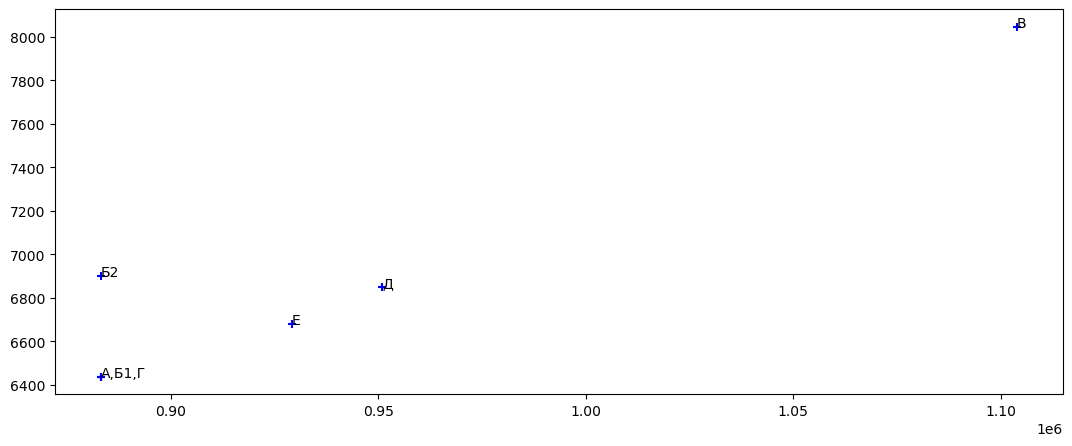

In [27]:
from matplotlib import pyplot


class IndexCoordinates:
    def __init__(self, index, x, y):
        self.indices = [index]
        self.x = x
        self.y = y
        self.x_bounds = [0.99 * x, 1.01 * x]
        self.y_bounds = [0.99 * y, 1.01 * y]

    def is_intersects(self, x, y):
        return self.x_bounds[0] <= x <= self.x_bounds[1] and self.y_bounds[0] <= y <= self.y_bounds[1]


fig, ax = pyplot.subplots(figsize=(13, 5))

coordinated_indices = []

for i, args in enumerate(results_args):
    values = (z1(args), z2(args))
    ax.scatter(z1(args), z2(args), marker='+', color='blue')
    index = indices[i]
    is_intersected = False
    for coordinated_index in coordinated_indices:
        if coordinated_index.is_intersects(*values):
            coordinated_index.indices.append(index)
            is_intersected = True
            break
    if not is_intersected:
        coordinated_indices.append(IndexCoordinates(index, *values))

for index in coordinated_indices:
    pyplot.text(index.x, index.y, ','.join(index.indices), fontsize=10)

pyplot.show()

Судя по данным таблицы и графика можно сделать вывод, что все решения являются Парето-оптимальными, т.е при каждом из них не получится улучшить результат одного показателя, не ухудшая при этом другого, а значит любой из предложенных вариантов может быть использован в зависимости от приоритетов предприятия.

## 4. Решение задачи стохастического программирования

Для решения задачу стохастического программирования в качестве основы была выбрана задача однокритериальной оптимизации методом введения метрики в пространстве критериев (см. п. 2.6):

\begin{gather}
f = \sum_{i=1}^{2}{\bigg( \frac{y_i^{min} - y_i}{y_i^{min}} \bigg)^2} \rightarrow min\\
\end{gather}

$$
\begin{bmatrix}
    0\\
    0\\
    8\\
    -\infty
\end{bmatrix}
\leq
\begin{bmatrix}
    1 && 0\\
    0 && 1\\
    \frac{b_1}{g_1 k_1} * (1 - c_1) && \frac{b_2}{g_2 k_2} * (1 - c_2)\\
    -\frac{a_1 b_1}{g_1} * (1 - c_1) && -\frac{a_2 b_2}{g_2} * (1 - c_2)
\end{bmatrix}
\times
\begin{bmatrix}
    d_1\\
    d_2
\end{bmatrix}
\leq
\begin{bmatrix}
    6\\
    5\\
    10\\
    0.8 y^{min}_1
\end{bmatrix}
$$

Пусть коэффициент максимального времени работы второй машины $v$ является независимой нормально распределенной случайной величиной:

\begin{gather}
v = N(\overline{v}, \sigma)
\end{gather}

\begin{array}{ l l }
\overline{v} = 1, && \sigma_2 = 0.5\\
\end{array}

где $\overline{v}$ – математическое ожидание случайной величины $v$, $\sigma_2$ – ее параметр распределения.

Теперь ограничение на минимальный порог прибыли является вероятностным. Его можно выразить следующим образом:

$$
P(h \leq m_2) = P(v d_2 \leq m_2) \geq \alpha
$$

где $0 \leq \alpha \leq 1$ – доверительная вероятность. Предлагается решить поставленную задачу стохастического программирования при $\alpha = 0.1, 0.2, \dots , 0.9$.

Основной подход к решению задач стохастического программирования состоит в преобразовании исходной вероятностной задачи в эквивалентную детерминированную. По определению функции распределения неравенство $P(h \leq m_2)\geq \alpha$ выполняется тогда и только тогда, когда:

$$
\frac{m_2 - M[h]}{\sqrt{D[h]}} \geq K_{\alpha}
$$

где $M[h]$ и $D[h]$ – математическое ожидание и дисперсия выражения $h$ соответственно, а $K_\alpha$ – это $\alpha$-квантиль распределения $N(0, 1)$.

Можно заметить, что это приводит к детерминированному нелинейному ограничению, которое эквивалентно исходному вероятностному и имеет вид:

$$
M[h] + K_{\alpha} \sqrt{D[h]} \leq m_2
$$

С учетом независимости $m_2$ можно выразить математическое ожидание и дисперсию следующим образом:

\begin{gather}
M[h] = M[v] d_2 = \overline{v} d_2\\
D[h] = D[v] d^2_2 = \sigma^2 d^2_2
\end{gather}

Итоговое ограничение выглядит следующим образом:

$$
\overline{v} d_2 + K_{\alpha} \sqrt{\sigma^2_2 d^2_2} = \overline{v} d_2 + K_{\alpha} \sigma_2 d_2 \leq m_2
$$

Полная формулировка задачи:

\begin{gather}
f = \sum_{i=1}^{2}{\bigg( \frac{y_i^{min} - y_i}{y_i^{min}} \bigg)^2} \rightarrow min\\
\overline{v} d_2 + K_{\alpha} \sigma_2 d_2 \leq m_2
\end{gather}

$$
\begin{bmatrix}
    0\\
    0\\
    8\\
    -\infty
\end{bmatrix}
\leq
\begin{bmatrix}
    1 && 0\\
    0 && 1\\
    \frac{b_1}{g_1 k_1} * (1 - c_1) && \frac{b_2}{g_2 k_2} * (1 - c_2)\\
    -\frac{a_1 b_1}{g_1} * (1 - c_1) && -\frac{a_2 b_2}{g_2} * (1 - c_2)
\end{bmatrix}
\times
\begin{bmatrix}
    d_1\\
    d_2
\end{bmatrix}
\leq
\begin{bmatrix}
    6\\
    5\\
    10\\
    0.8 y^{min}_1
\end{bmatrix}
$$

Нелинейное ограничение:

In [38]:
expected_value = 1
dispersion = 0.5


def cons_f(d, q):
    return expected_value * d + q * dispersion * d

Решение задачи:

In [39]:
from scipy.optimize import NonlinearConstraint
from scipy.stats import norm

stochastic_opt_results = []
stochastic_bounds = [[m_min[0], m_max[0]], [m_min[1], None]]
for q in np.arange(0.1, 1, 0.1):
    quantile = norm.ppf(q)
    stochastic_constraint = NonlinearConstraint(lambda d: cons_f(d, quantile), -np.inf, m_max[1])
    stochastic_opt_results.append(
        optimize(f_metric, bounds=stochastic_bounds, constraints=[full_constraints, stochastic_constraint]))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_trustregion_constr\projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


Подробные результаты:

In [40]:
alpha_values = ['{:.1f}'.format(i) for i in np.arange(0.1, 1, 0.1)]
alpha_values.append('determined')

all_stochastic_opt_results = stochastic_opt_results + [f7_opt_result]

z1_values = [z1(r.args) for r in all_stochastic_opt_results]

z2_values = [z2(r.args) for r in all_stochastic_opt_results]

x1_values = []
x2_values = []
for r in all_stochastic_opt_results:
    x = r.get_x()
    x1_values.append(x[0])
    x2_values.append(x[1])

stochastic_results_table = DataFrame({
    'aplha': alpha_values,
    'z_1': z1_values,
    'z_2': z2_values,
    'x_1': x1_values,
    'x_2': x2_values,
})
stochastic_results_table.set_index('aplha')

,z_1,z_2,x_1,x_2
aplha,,,,
0.1,960190.76,6721.50,7.05,26666.32
0.2,960197.72,6721.55,7.02,26666.54
0.3,960148.89,6721.23,7.74,26664.61
0.4,936694.05,6650.42,3898.24,22900.69
0.5,929383.06,6680.43,7281.11,19991.31
0.6,923412.48,6700.88,9874.68,17750.60
0.7,918466.77,6719.45,12091.03,15840.14
0.8,913859.02,6736.31,14137.39,14075.06
0.9,883199.85,6550.40,15333.33,12266.66


Судя по полученным данным какой бы ни была доверительная вероятность $\alpha$, значение будет одним и тем же и примерно равно значениям, полученных при детерминированном ограничении. Если разобраться, становится понятно, что процесс оптимизации упирается в верхнюю границу параметры $d_2$. При этом все условия выполняются, более того, условие минимально возможной прибыли даже не достигает своего порога.

Таким образом получается, что решение задачи методом стохастического программирования с данными условиями не позволяет оценить влияние случайных величин и доверительных вероятностей на критерии оптимальности, т.к. процесс поиска оптимального решения просто не затрагивает значения параметров, при которых значения критериев близки к критическим.

## Вывод

В данной работе было рассмотрено несколько способов решения задачи оптимизации нескольких критериев.

Среди полученных решений, можно заметить следующее:

- Решения методами минимакс и мультипликативной свертки почти идентичны
- Решения методами выделения главного критерия, аддитивной свертки и, соответственно, последовательных уступок почти идентичны

Оба свойства обусловлены тем, что каждая группа подбирая соответствующие ограничениям параметры, дающие лучшие результаты по одному из критериев. В случае 1й группы это максимизация прибыли, а в случае 2й – минимизация затрат.

Методами goal attain и метрик критериев дают решения с усредненными результатами критериев.

Была попытка проанализировать решения задачи с вероятностным ограничением методом стохастического программирования, однако из-за того, что вне зависимости от вероятностной составляющей, решения упираются в другие ограничения.